In [1]:
import torch, torchaudio

from models import LSTMClassifier, GRUClassifier, CNN_RNN
from datasets import SoundTracksDataset
from train import MultiClassTrainer
from data_visualisation import plot_spectrogram
from data_preparation import INT_TO_LABEL

In [2]:
torch.manual_seed(0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dset = SoundTracksDataset(train=True).to(device)
train_dset, val_dset = dset.train_test_split(0.2)
val_dset, test_dset = val_dset.train_test_split(0.5)

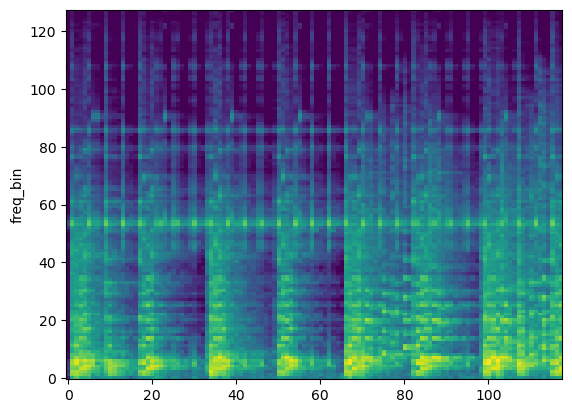

In [3]:
plot_spectrogram(train_dset.melspecs[0].cpu())

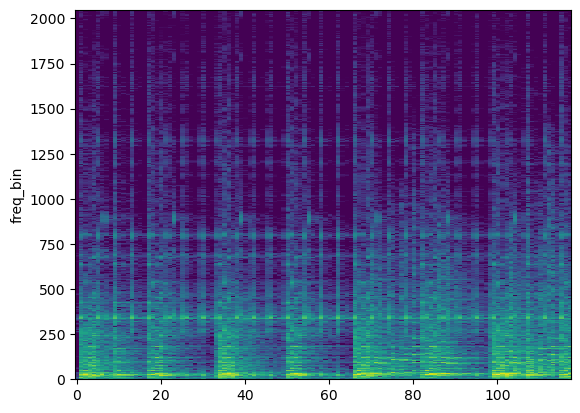

In [4]:
plot_spectrogram(train_dset.spectrograms[0].cpu(), to_db=True)

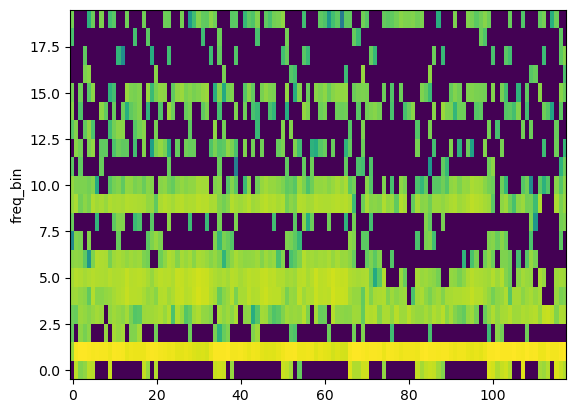

In [5]:
plot_spectrogram(train_dset.mfcc[0].cpu(), to_db=True)

torch.Size([170, 4])
Training start
Epoch 0    Train Loss=42.6244    Train Acc=0.3824    Val Loss=42.5962    Val Acc=0.2857
Epoch 1    Train Loss=40.9889    Train Acc=0.4118    Val Loss=40.7896    Val Acc=0.2857
Epoch 2    Train Loss=39.8448    Train Acc=0.4471    Val Loss=39.7057    Val Acc=0.4286
Epoch 3    Train Loss=38.7630    Train Acc=0.4824    Val Loss=38.7689    Val Acc=0.4762
Epoch 4    Train Loss=37.8012    Train Acc=0.4588    Val Loss=37.8977    Val Acc=0.4286
Epoch 5    Train Loss=36.9256    Train Acc=0.4529    Val Loss=36.8688    Val Acc=0.3810
Epoch 6    Train Loss=36.1361    Train Acc=0.5176    Val Loss=36.1261    Val Acc=0.5714
Epoch 7    Train Loss=35.4230    Train Acc=0.4882    Val Loss=35.3939    Val Acc=0.5714
Epoch 8    Train Loss=34.6618    Train Acc=0.5412    Val Loss=34.7333    Val Acc=0.5714
Epoch 9    Train Loss=33.9377    Train Acc=0.5176    Val Loss=33.9501    Val Acc=0.5714
Epoch 10    Train Loss=33.2338    Train Acc=0.5235    Val Loss=33.1879    Val Acc=0.

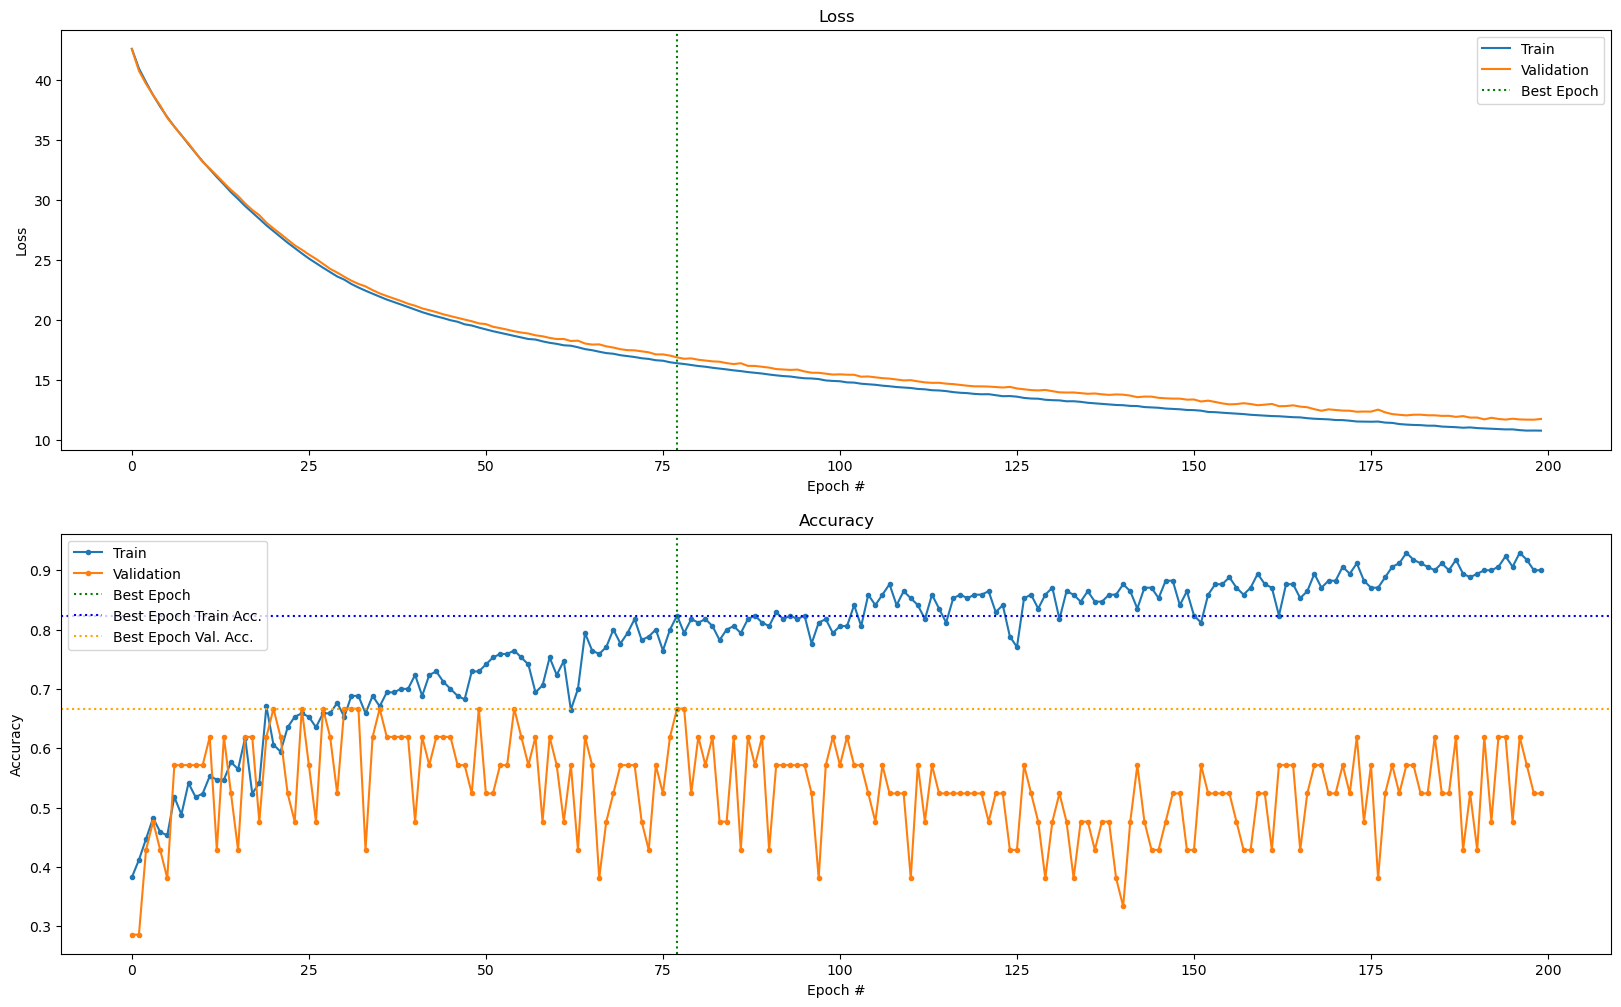

In [6]:
model1 = LSTMClassifier(
    feature='mfcc',
    input_size=20,
    hidden_size=8,
    out_features=4,
    num_layers=1,
).to(device)

print(model1(train_dset.features).shape)

trainer = MultiClassTrainer(
    num_classes=4,
    device=device
)

bs = 8
epochs = 200
lam = 1.0
l1_ratio = 0.1
lr = 0.0005

trainer.train(model1, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=True)

print(trainer.evaluate_performance(model1, test_dset))

torch.Size([170, 4])
Training start
Epoch 0    Train Loss=353.5769    Train Acc=0.3176    Val Loss=353.3984    Val Acc=0.3810
Epoch 1    Train Loss=343.0377    Train Acc=0.4176    Val Loss=343.2531    Val Acc=0.2381
Epoch 2    Train Loss=333.4215    Train Acc=0.4235    Val Loss=333.8433    Val Acc=0.2381
Epoch 3    Train Loss=324.0357    Train Acc=0.4765    Val Loss=324.7090    Val Acc=0.2381
Epoch 4    Train Loss=314.9068    Train Acc=0.4294    Val Loss=315.2290    Val Acc=0.2857
Epoch 5    Train Loss=305.8746    Train Acc=0.5412    Val Loss=306.4270    Val Acc=0.2381
Epoch 6    Train Loss=297.0936    Train Acc=0.4353    Val Loss=297.4459    Val Acc=0.4286
Epoch 7    Train Loss=288.4439    Train Acc=0.5176    Val Loss=288.8844    Val Acc=0.3810
Epoch 8    Train Loss=280.0853    Train Acc=0.5000    Val Loss=280.3964    Val Acc=0.4286
Epoch 9    Train Loss=271.8155    Train Acc=0.5765    Val Loss=272.2566    Val Acc=0.2381
Epoch 10    Train Loss=263.7477    Train Acc=0.6000    Val Loss=

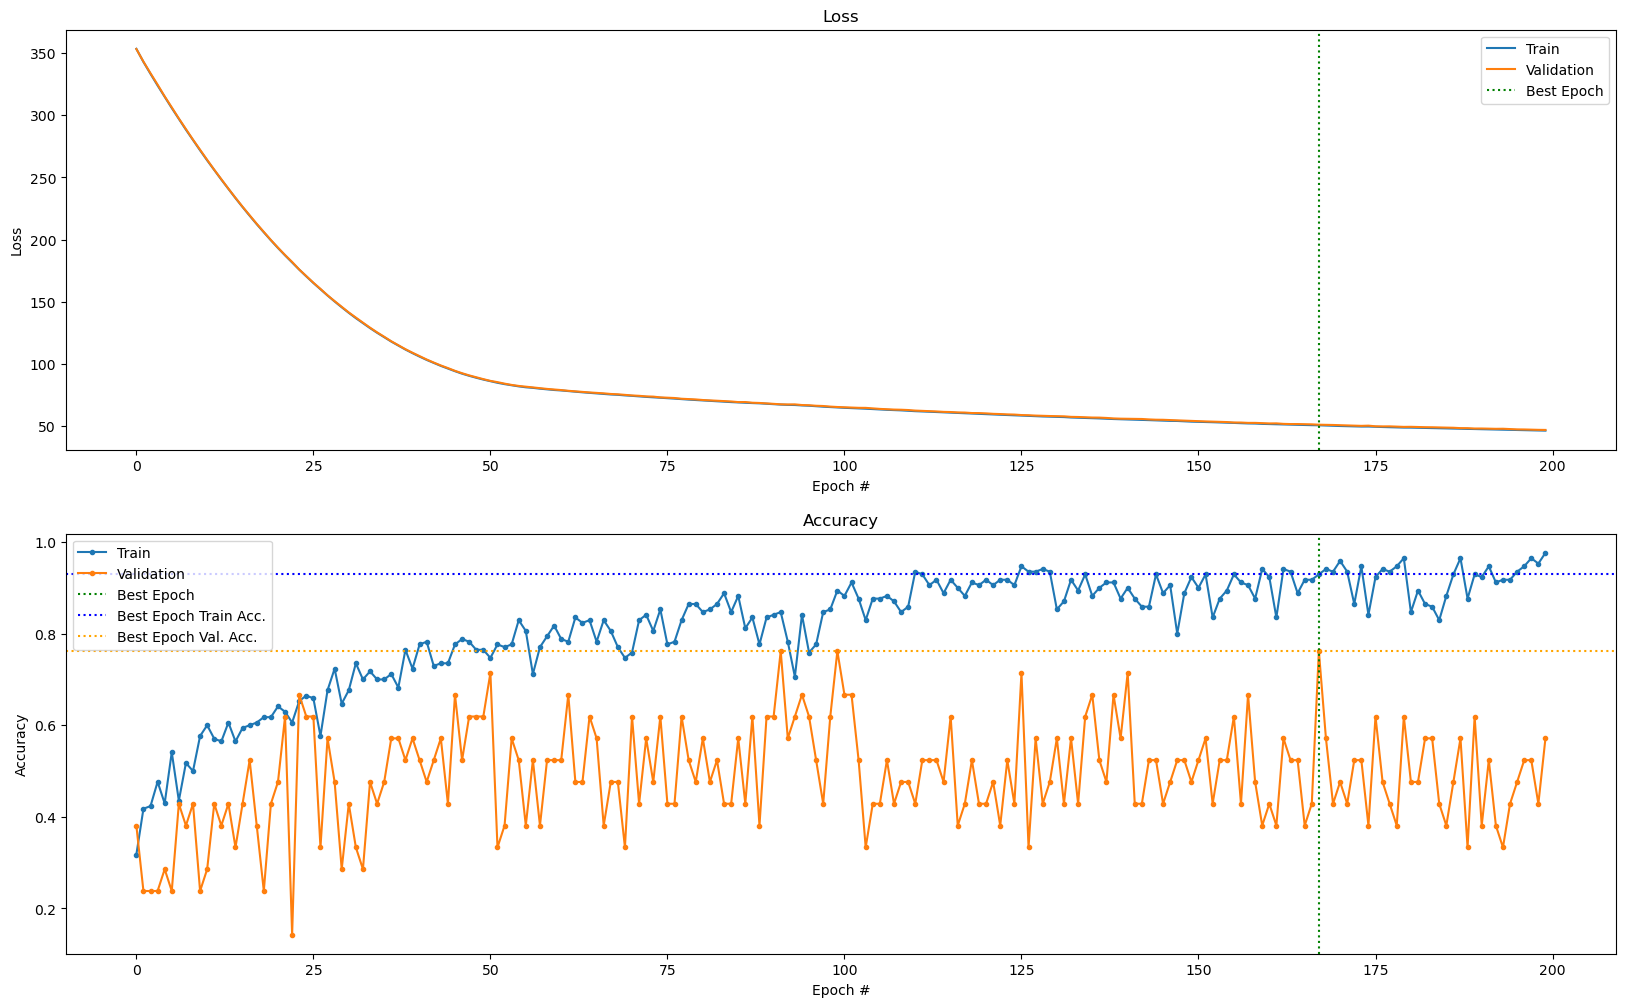

In [7]:
model2 = LSTMClassifier(
    feature='melspecs',
    input_size=128,
    hidden_size=64,
    out_features=4,
    num_layers=1,
).to(device)

print(model2(train_dset.features).shape)

bs = 8
epochs = 200
lam = 1.0
l1_ratio = 0.1
lr = 0.0001

trainer.train(model2, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=True)

print(trainer.evaluate_performance(model2, test_dset))

torch.Size([170, 4])
Training start
Epoch 0    Train Loss=4782.0283    Train Acc=0.2471    Val Loss=4781.8691    Val Acc=0.4762
Epoch 1    Train Loss=4552.4468    Train Acc=0.2941    Val Loss=4552.3564    Val Acc=0.4762
Epoch 2    Train Loss=4330.1245    Train Acc=0.3471    Val Loss=4330.1279    Val Acc=0.4762
Epoch 3    Train Loss=4114.2754    Train Acc=0.4294    Val Loss=4114.3354    Val Acc=0.4762
Epoch 4    Train Loss=3904.4780    Train Acc=0.5000    Val Loss=3904.5950    Val Acc=0.4762
Epoch 5    Train Loss=3700.9473    Train Acc=0.5471    Val Loss=3701.1238    Val Acc=0.3333
Epoch 6    Train Loss=3503.2947    Train Acc=0.5765    Val Loss=3503.5183    Val Acc=0.3333
Epoch 7    Train Loss=3311.6553    Train Acc=0.6471    Val Loss=3311.9250    Val Acc=0.3810
Epoch 8    Train Loss=3125.7703    Train Acc=0.6647    Val Loss=3126.0796    Val Acc=0.3810
Epoch 9    Train Loss=2945.7517    Train Acc=0.7000    Val Loss=2946.0750    Val Acc=0.3333
Epoch 10    Train Loss=2771.4854    Train Ac

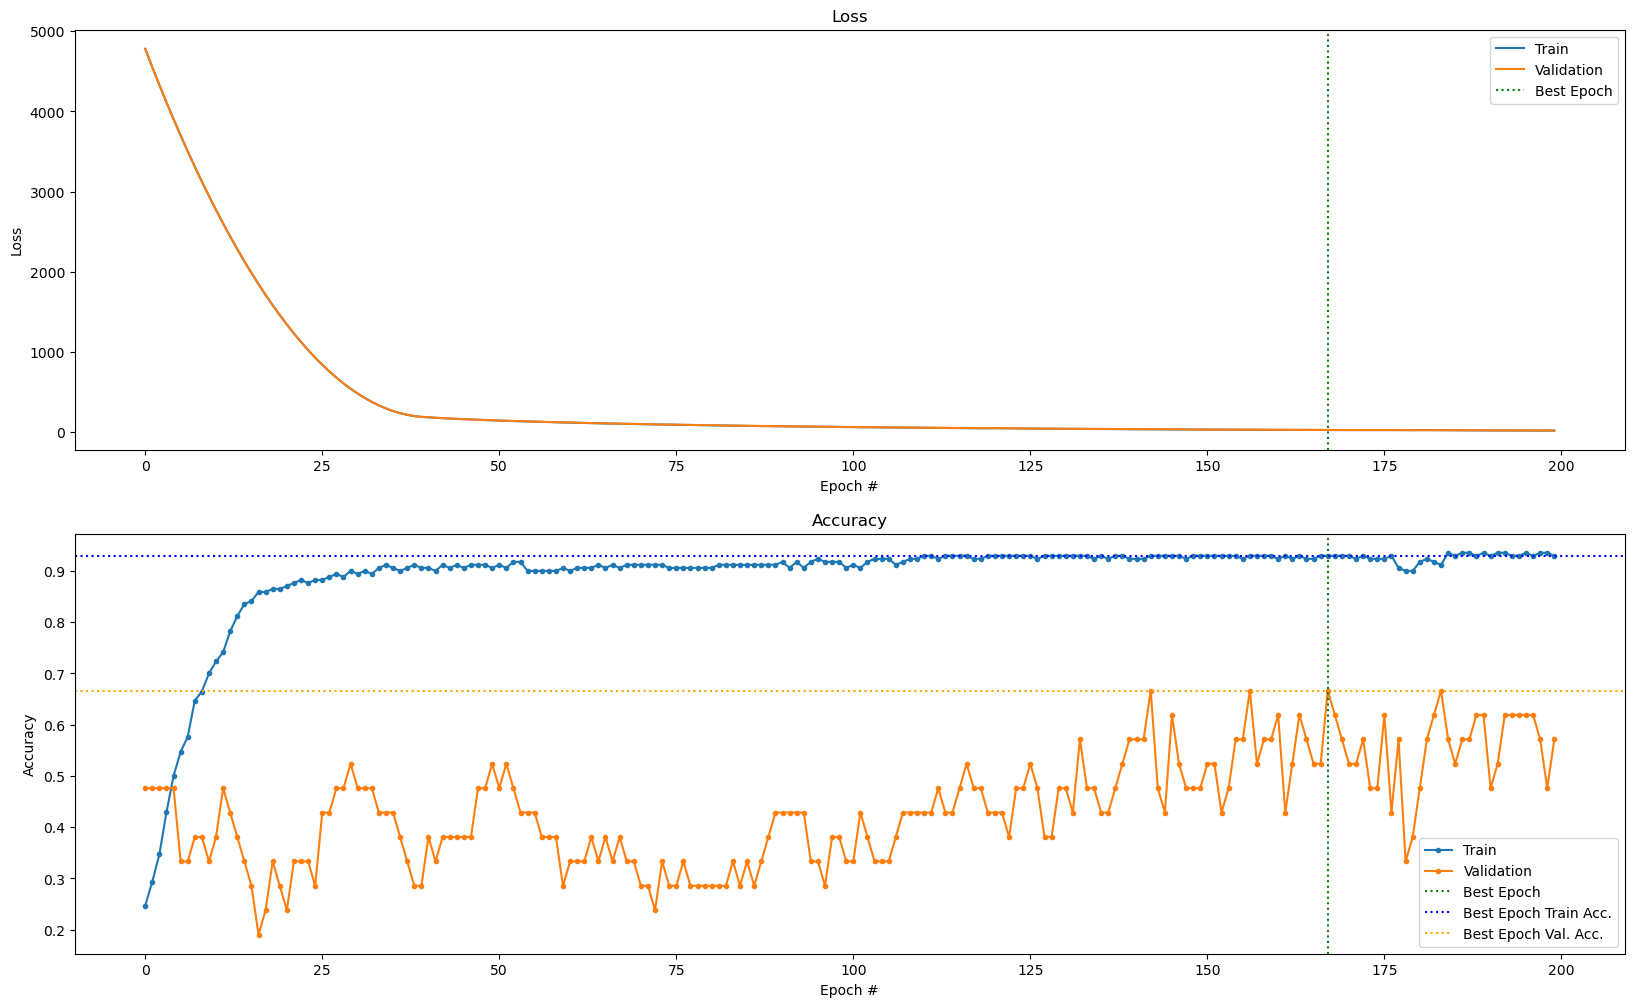

In [8]:
model3 = LSTMClassifier(
    feature='spectrograms',
    input_size=2049,
    hidden_size=128,
    out_features=4,
    num_layers=1,
).to(device)

print(model3(train_dset.features).shape)

bs = 8
epochs = 200
lam = 1.0
l1_ratio = 0.1
lr = 0.0001

trainer.train(model3, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=True)

print(trainer.evaluate_performance(model3, test_dset))

torch.Size([170, 4])
Training start
Epoch 0    Train Loss=3587.0737    Train Acc=0.2941    Val Loss=3587.1743    Val Acc=0.1429
Epoch 1    Train Loss=3411.5813    Train Acc=0.3118    Val Loss=3411.7017    Val Acc=0.1429
Epoch 2    Train Loss=3241.2295    Train Acc=0.3824    Val Loss=3241.3643    Val Acc=0.1429
Epoch 3    Train Loss=3075.8320    Train Acc=0.4176    Val Loss=3075.9841    Val Acc=0.1429
Epoch 4    Train Loss=2915.3069    Train Acc=0.4529    Val Loss=2915.4807    Val Acc=0.1429
Epoch 5    Train Loss=2759.4307    Train Acc=0.4706    Val Loss=2759.6223    Val Acc=0.1429
Epoch 6    Train Loss=2608.4780    Train Acc=0.5235    Val Loss=2608.6824    Val Acc=0.1429
Epoch 7    Train Loss=2462.0925    Train Acc=0.5471    Val Loss=2462.3088    Val Acc=0.1429
Epoch 8    Train Loss=2320.2192    Train Acc=0.5647    Val Loss=2320.4519    Val Acc=0.1429
Epoch 9    Train Loss=2182.9233    Train Acc=0.5882    Val Loss=2183.1682    Val Acc=0.1429
Epoch 10    Train Loss=2050.1667    Train Ac

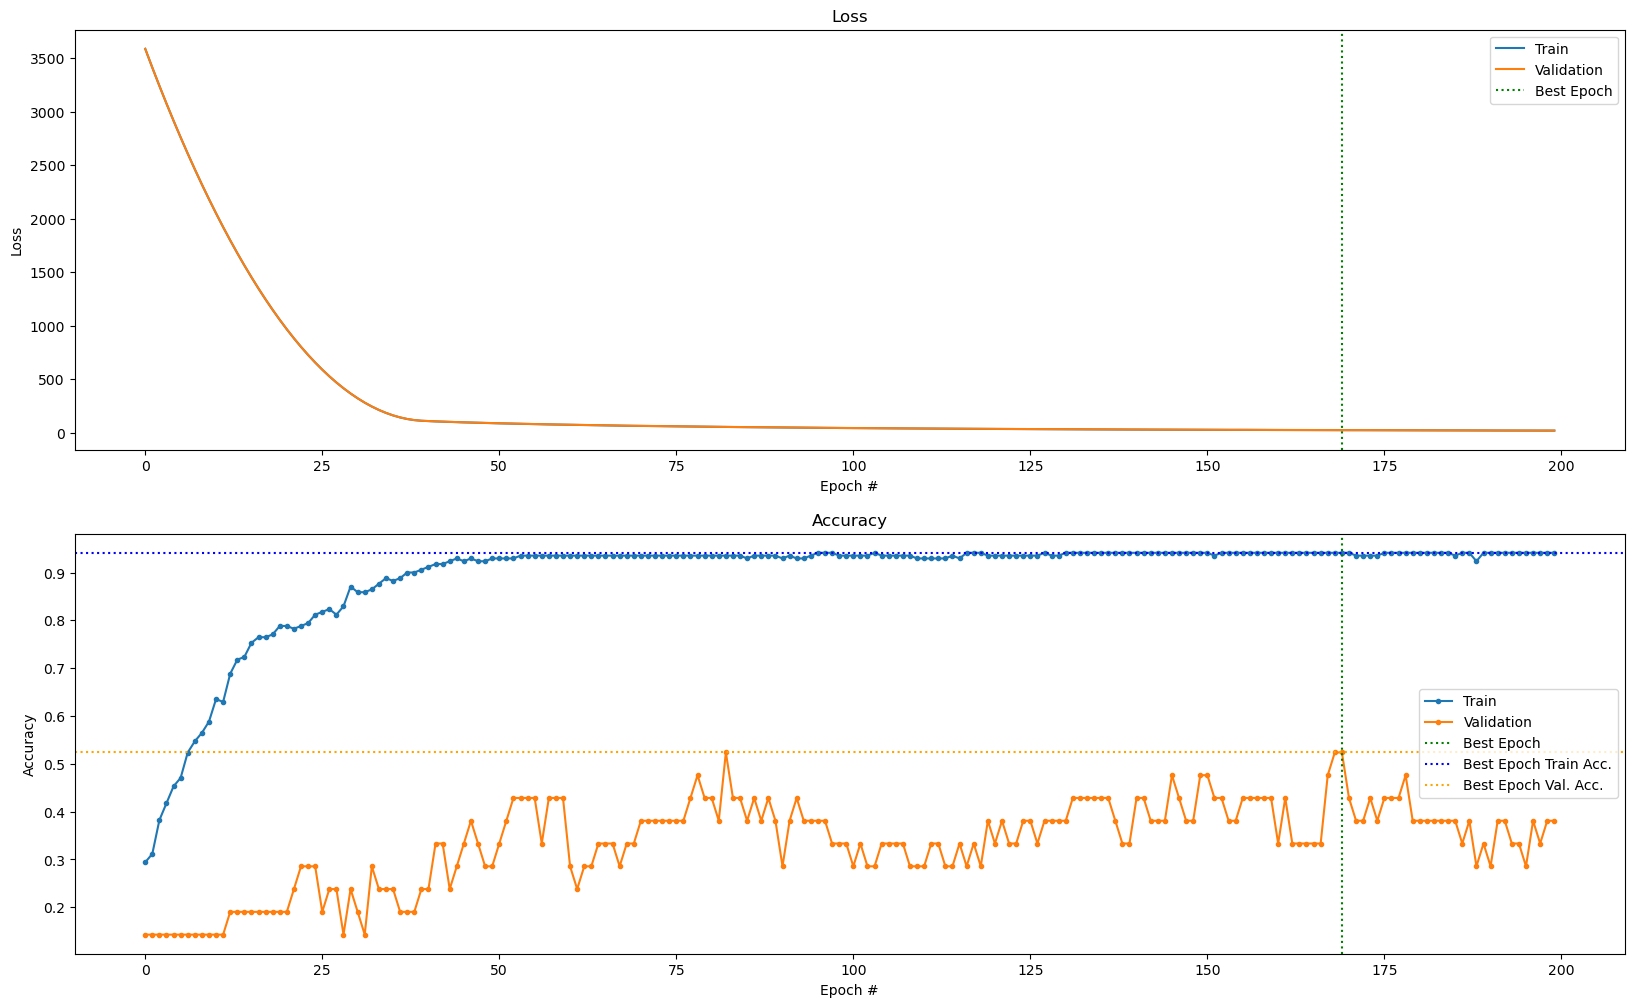

In [9]:
model4 = GRUClassifier(
    feature='spectrograms',
    input_size=2049,
    hidden_size=128,
    out_features=4,
    num_layers=1,
).to(device)

print(model4(train_dset.features).shape)

bs = 8
epochs = 200
lam = 1.0
l1_ratio = 0.1
lr = 0.0001

trainer.train(model4, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=True)

print(trainer.evaluate_performance(model4, test_dset))

torch.Size([170, 4])
Training start
Epoch 0    Train Loss=134.1547    Train Acc=0.2824    Val Loss=134.1816    Val Acc=0.0952
Epoch 1    Train Loss=130.2998    Train Acc=0.2941    Val Loss=130.3191    Val Acc=0.1905
Epoch 2    Train Loss=126.5442    Train Acc=0.3294    Val Loss=126.5736    Val Acc=0.1429
Epoch 3    Train Loss=122.8722    Train Acc=0.2882    Val Loss=122.8931    Val Acc=0.2381
Epoch 4    Train Loss=119.2629    Train Acc=0.3000    Val Loss=119.2826    Val Acc=0.2381
Epoch 5    Train Loss=115.7430    Train Acc=0.3176    Val Loss=115.7537    Val Acc=0.1905
Epoch 6    Train Loss=112.2809    Train Acc=0.3471    Val Loss=112.2821    Val Acc=0.2381
Epoch 7    Train Loss=108.8874    Train Acc=0.4353    Val Loss=108.8759    Val Acc=0.4762
Epoch 8    Train Loss=105.5649    Train Acc=0.4353    Val Loss=105.5555    Val Acc=0.5714
Epoch 9    Train Loss=102.3231    Train Acc=0.3882    Val Loss=102.3075    Val Acc=0.5238
Epoch 10    Train Loss=99.1382    Train Acc=0.4294    Val Loss=9

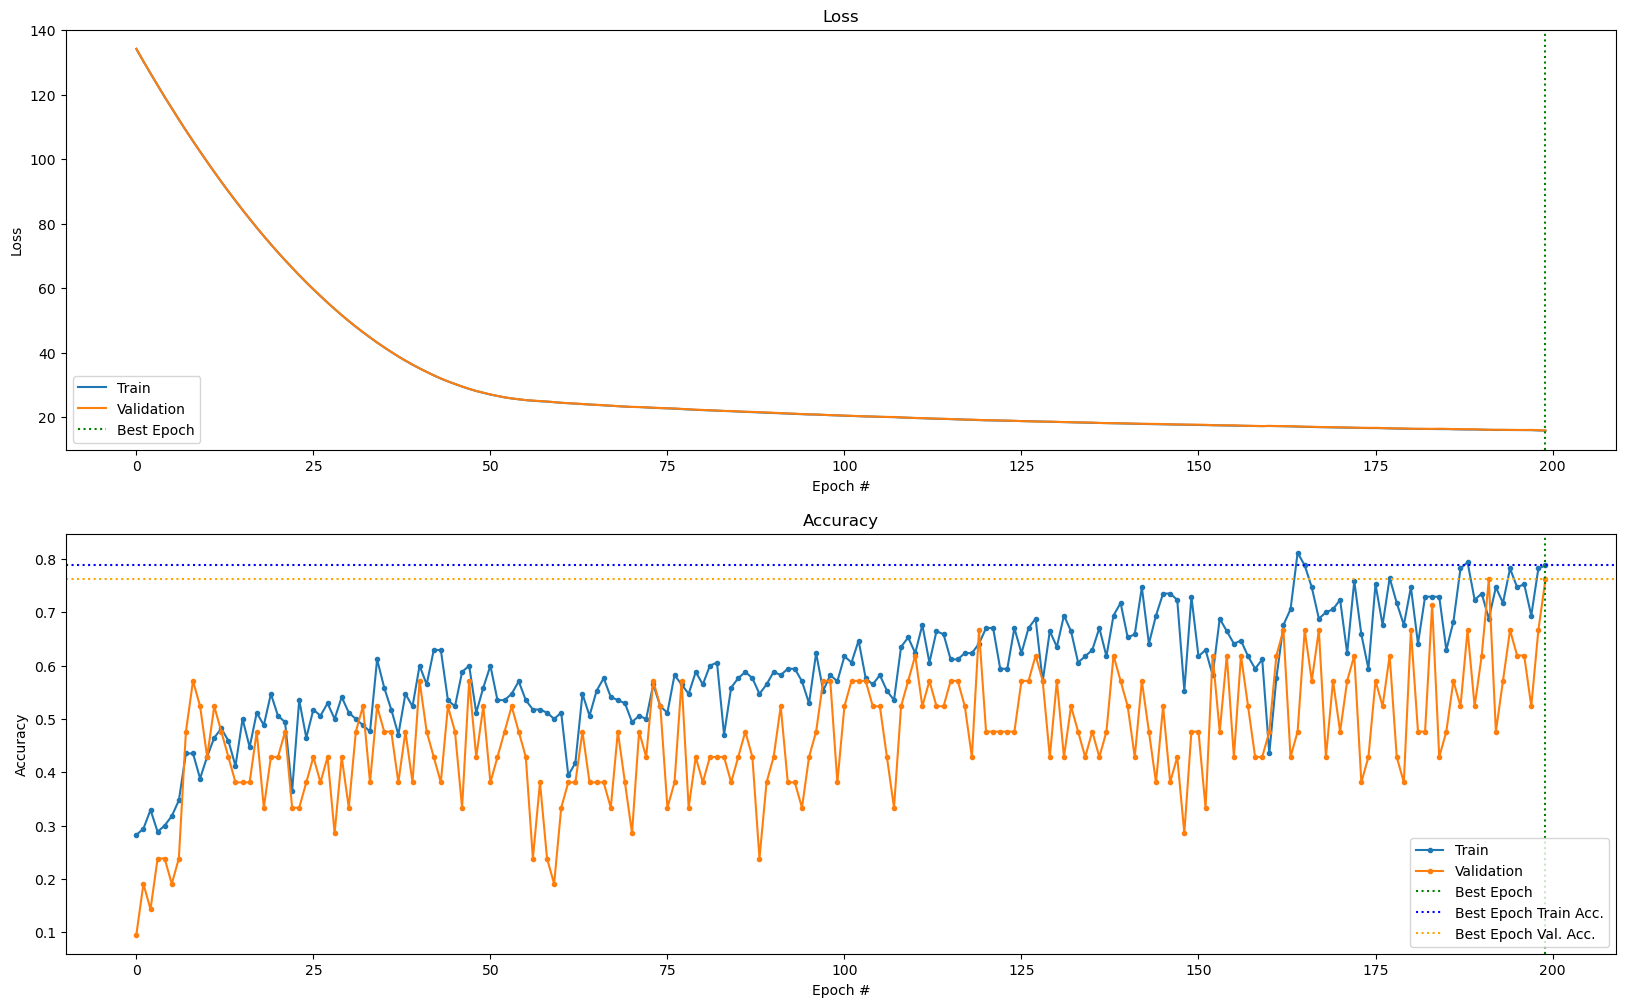

In [20]:
model5 = GRUClassifier(
    feature='melspecs',
    input_size=128,
    hidden_size=64,
    out_features=4,
    num_layers=1,
).to(device)

print(model5(train_dset.features).shape)

bs = 8
epochs = 200
lam = 0.5
l1_ratio = 0.1
lr = 0.0001

trainer.train(model5, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=True)

print(trainer.evaluate_performance(model5, test_dset))

torch.Size([170, 4])
Training start
Epoch 0    Train Loss=33.7694    Train Acc=0.2765    Val Loss=33.7420    Val Acc=0.3333
Epoch 1    Train Loss=33.3615    Train Acc=0.2824    Val Loss=33.3362    Val Acc=0.3333
Epoch 2    Train Loss=32.9645    Train Acc=0.2706    Val Loss=32.9468    Val Acc=0.3333
Epoch 3    Train Loss=32.5764    Train Acc=0.2824    Val Loss=32.5644    Val Acc=0.2857
Epoch 4    Train Loss=32.2021    Train Acc=0.2882    Val Loss=32.1902    Val Acc=0.2857
Epoch 5    Train Loss=31.8396    Train Acc=0.3059    Val Loss=31.8297    Val Acc=0.3333
Epoch 6    Train Loss=31.4804    Train Acc=0.3059    Val Loss=31.4658    Val Acc=0.3333
Epoch 7    Train Loss=31.1269    Train Acc=0.2941    Val Loss=31.1104    Val Acc=0.3333
Epoch 8    Train Loss=30.7754    Train Acc=0.3529    Val Loss=30.7570    Val Acc=0.2857
Epoch 9    Train Loss=30.4250    Train Acc=0.3647    Val Loss=30.4053    Val Acc=0.2857
Epoch 10    Train Loss=30.0783    Train Acc=0.3765    Val Loss=30.0581    Val Acc=0.

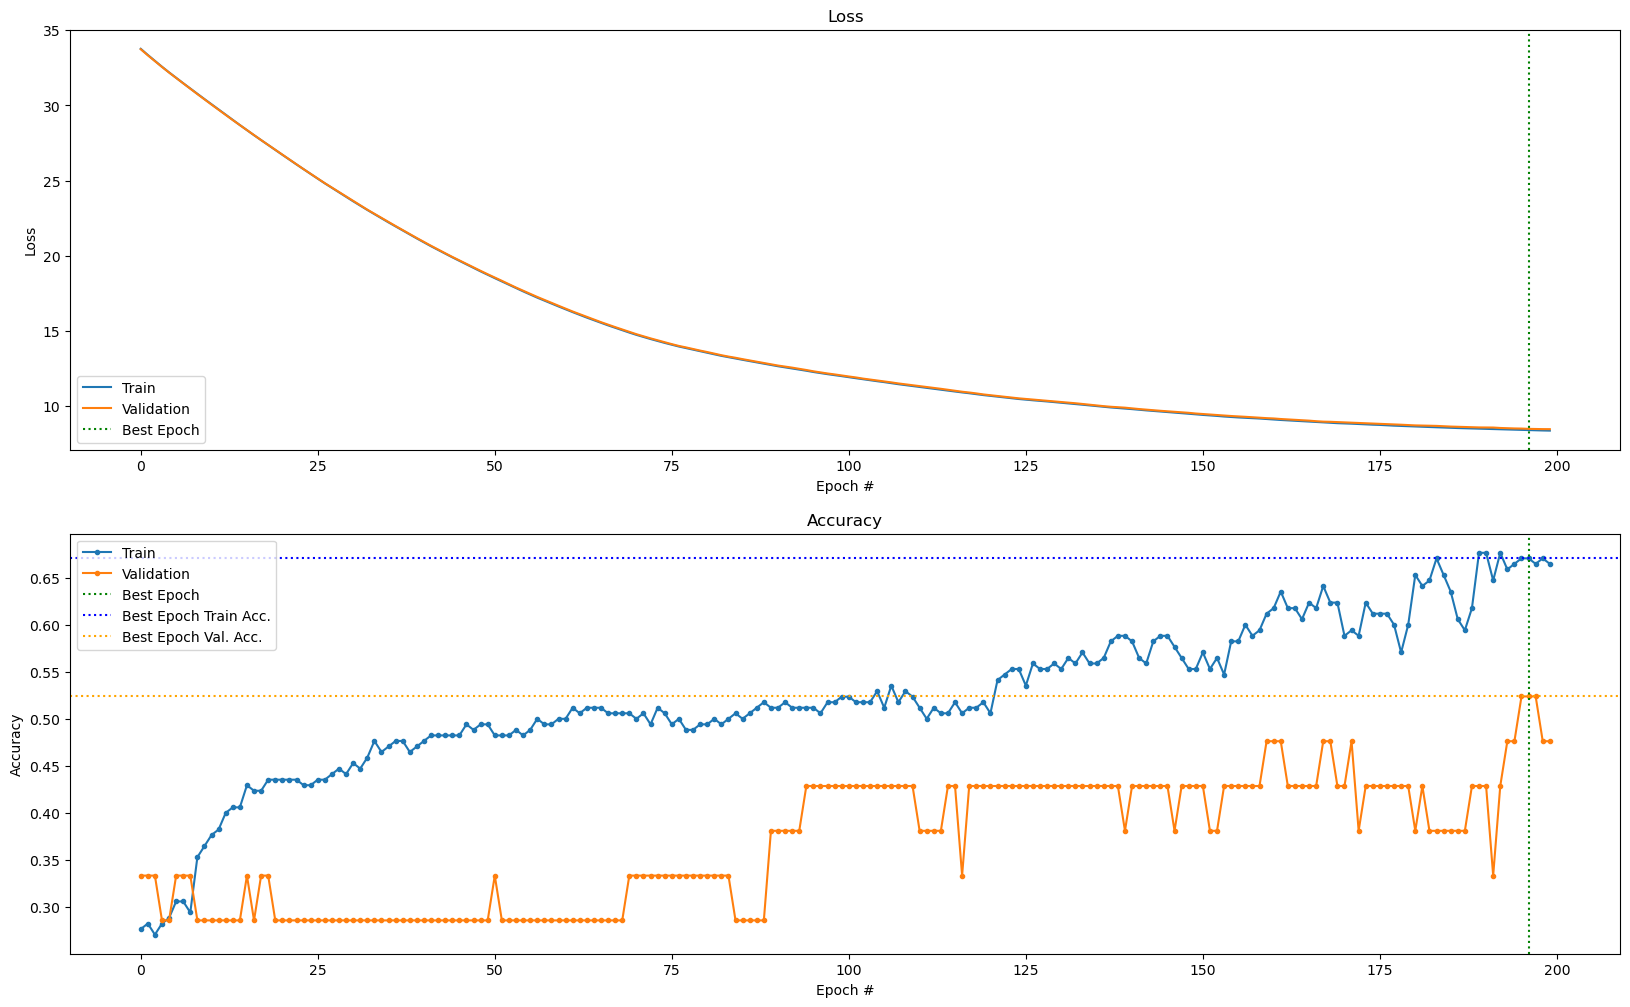

In [11]:
### BEST MODEL  
model6 = GRUClassifier(
    feature='mfcc',
    input_size=20,
    hidden_size=8,
    out_features=4,
    num_layers=1,
).to(device)

print(model6(train_dset.features).shape)

bs = 8
epochs = 200
lam = 1.0
l1_ratio = 0.1
lr = 0.0002

trainer.train(model6, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=True)

print(trainer.evaluate_performance(model6, test_dset))

torch.Size([170, 4])
Training start
Epoch 0    Train Loss=66.8292    Train Acc=0.2647    Val Loss=66.7410    Val Acc=0.2857
Epoch 1    Train Loss=64.2649    Train Acc=0.3412    Val Loss=64.2745    Val Acc=0.3333
Epoch 2    Train Loss=61.8865    Train Acc=0.4235    Val Loss=61.9277    Val Acc=0.4286
Epoch 3    Train Loss=59.6260    Train Acc=0.4412    Val Loss=59.6117    Val Acc=0.4762
Epoch 4    Train Loss=57.5080    Train Acc=0.4353    Val Loss=57.5786    Val Acc=0.4762
Epoch 5    Train Loss=55.4678    Train Acc=0.4882    Val Loss=55.5054    Val Acc=0.4286
Epoch 6    Train Loss=53.4905    Train Acc=0.5353    Val Loss=53.5777    Val Acc=0.5238
Epoch 7    Train Loss=51.6245    Train Acc=0.5000    Val Loss=51.6944    Val Acc=0.5238
Epoch 8    Train Loss=49.8016    Train Acc=0.5235    Val Loss=49.9241    Val Acc=0.5238
Epoch 9    Train Loss=48.0549    Train Acc=0.5471    Val Loss=48.1950    Val Acc=0.5714
Epoch 10    Train Loss=46.3181    Train Acc=0.5882    Val Loss=46.4003    Val Acc=0.

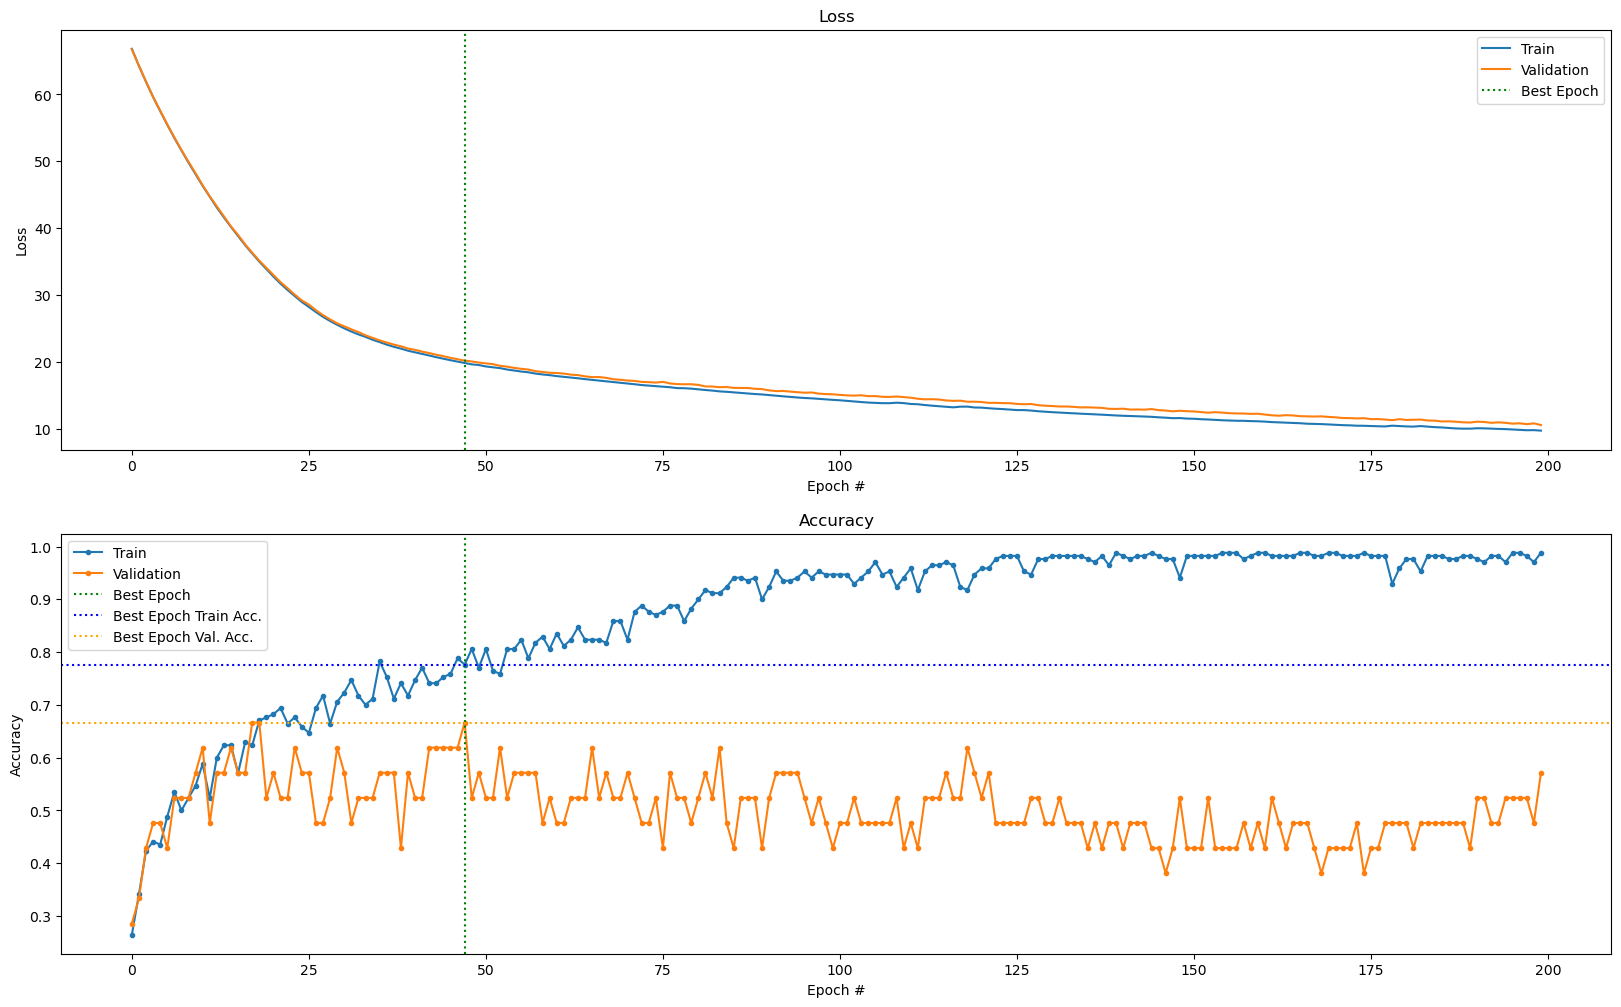

In [12]:
model7 = LSTMClassifier(
    feature='mfcc',
    input_size=20,
    hidden_size=8,
    out_features=4,
    num_layers=1,
    bidirectional=True
).to(device)

print(model7(train_dset.features).shape)

trainer = MultiClassTrainer(
    num_classes=4,
    device=device
)

bs = 8
epochs = 200
lam = 1.0
l1_ratio = 0.1
lr = 0.0005

trainer.train(model7, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=True)

print(trainer.evaluate_performance(model7, test_dset))

torch.Size([170, 4])
Training start
Epoch 0    Train Loss=680.6040    Train Acc=0.2000    Val Loss=681.4504    Val Acc=0.0952
Epoch 1    Train Loss=659.7910    Train Acc=0.2588    Val Loss=660.0815    Val Acc=0.2381
Epoch 2    Train Loss=639.6447    Train Acc=0.3647    Val Loss=639.7678    Val Acc=0.3810
Epoch 3    Train Loss=620.0047    Train Acc=0.4235    Val Loss=620.6861    Val Acc=0.2381
Epoch 4    Train Loss=600.8292    Train Acc=0.4647    Val Loss=601.2216    Val Acc=0.2857
Epoch 5    Train Loss=582.1005    Train Acc=0.5882    Val Loss=582.7801    Val Acc=0.3333
Epoch 6    Train Loss=563.9230    Train Acc=0.5294    Val Loss=564.2744    Val Acc=0.4286
Epoch 7    Train Loss=546.3327    Train Acc=0.4706    Val Loss=546.4472    Val Acc=0.4762
Epoch 8    Train Loss=528.7666    Train Acc=0.5529    Val Loss=529.1490    Val Acc=0.4286
Epoch 9    Train Loss=511.7672    Train Acc=0.5706    Val Loss=512.1216    Val Acc=0.4286
Epoch 10    Train Loss=495.2338    Train Acc=0.5471    Val Loss=

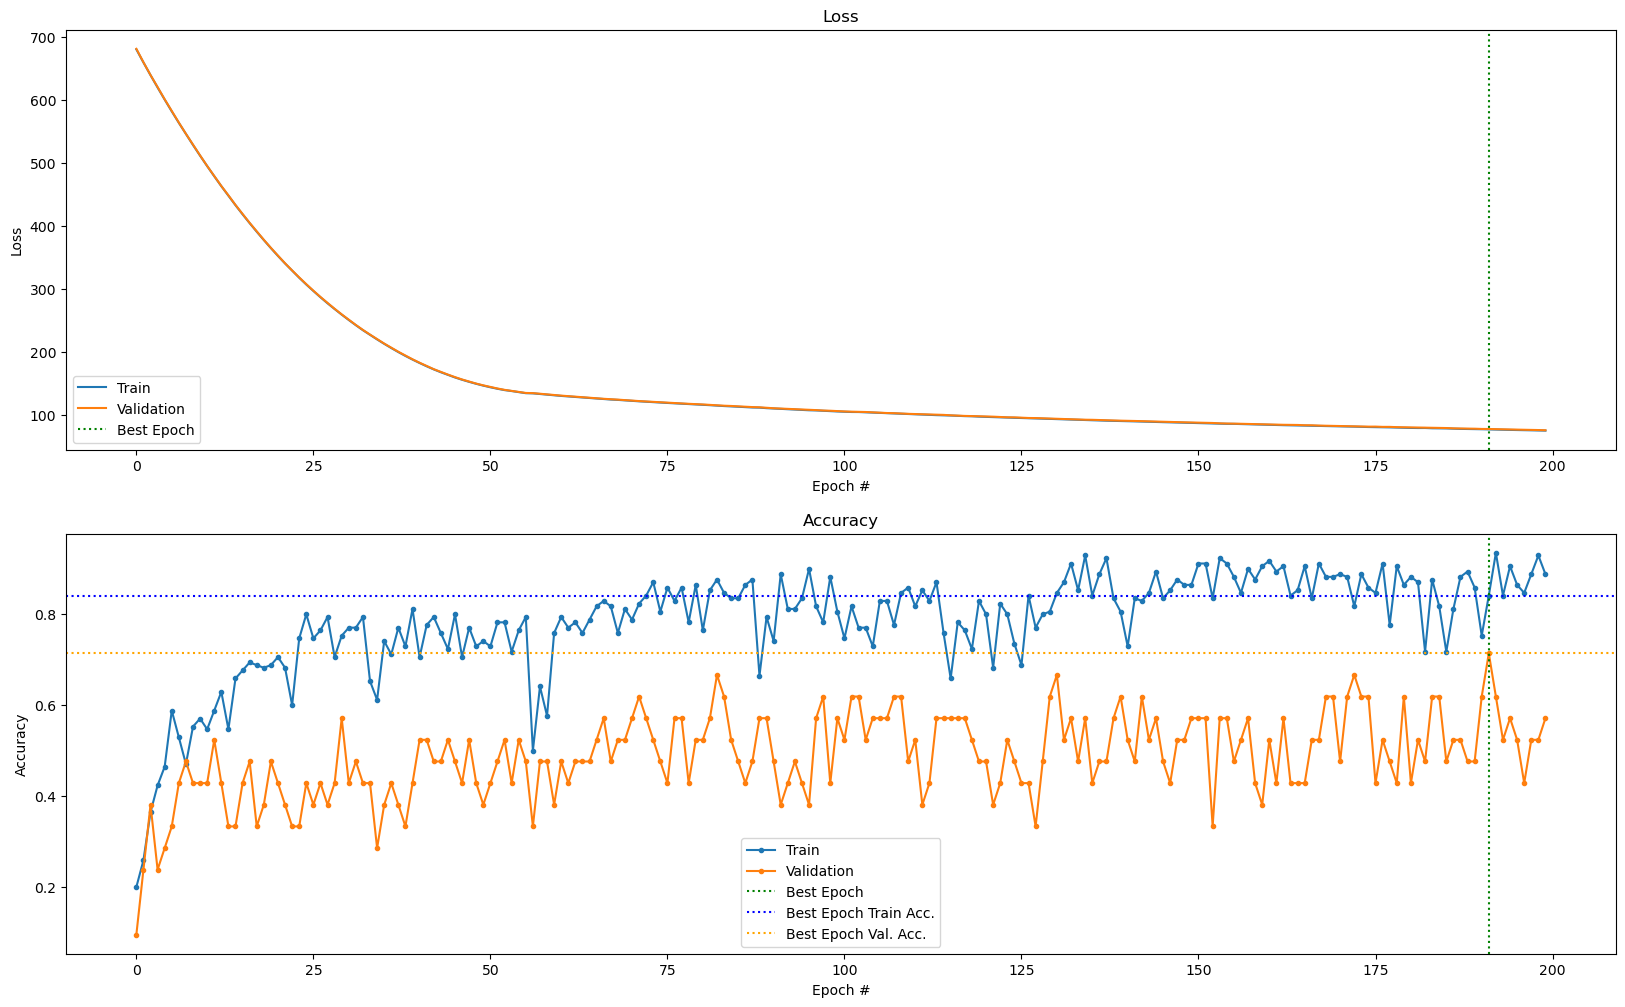

In [13]:
model8 = LSTMClassifier(
    feature='melspecs',
    input_size=128,
    hidden_size=64,
    out_features=4,
    num_layers=1,
    bidirectional=True
).to(device)

print(model8(train_dset.features).shape)

trainer = MultiClassTrainer(
    num_classes=4,
    device=device
)

bs = 8
epochs = 200
lam = 1.0
l1_ratio = 0.1
lr = 0.0001

trainer.train(model8, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=True)

print(trainer.evaluate_performance(model8, test_dset))

torch.Size([170, 4])
Training start
Epoch 0    Train Loss=956.3407    Train Acc=0.3294    Val Loss=956.2457    Val Acc=0.3810
Epoch 1    Train Loss=914.1028    Train Acc=0.4706    Val Loss=914.1292    Val Acc=0.3810
Epoch 2    Train Loss=873.6028    Train Acc=0.6412    Val Loss=873.7766    Val Acc=0.2857
Epoch 3    Train Loss=834.3980    Train Acc=0.7176    Val Loss=834.6805    Val Acc=0.3333
Epoch 4    Train Loss=796.3121    Train Acc=0.7941    Val Loss=796.6732    Val Acc=0.3333
Epoch 5    Train Loss=759.2448    Train Acc=0.8765    Val Loss=759.6693    Val Acc=0.3333
Epoch 6    Train Loss=723.2701    Train Acc=0.9235    Val Loss=723.7411    Val Acc=0.3333
Epoch 7    Train Loss=688.2786    Train Acc=0.9235    Val Loss=688.7888    Val Acc=0.2857
Epoch 8    Train Loss=654.3084    Train Acc=0.9353    Val Loss=654.8546    Val Acc=0.2857
Epoch 9    Train Loss=621.3508    Train Acc=0.9471    Val Loss=621.9366    Val Acc=0.2857
Epoch 10    Train Loss=589.3654    Train Acc=0.9588    Val Loss=

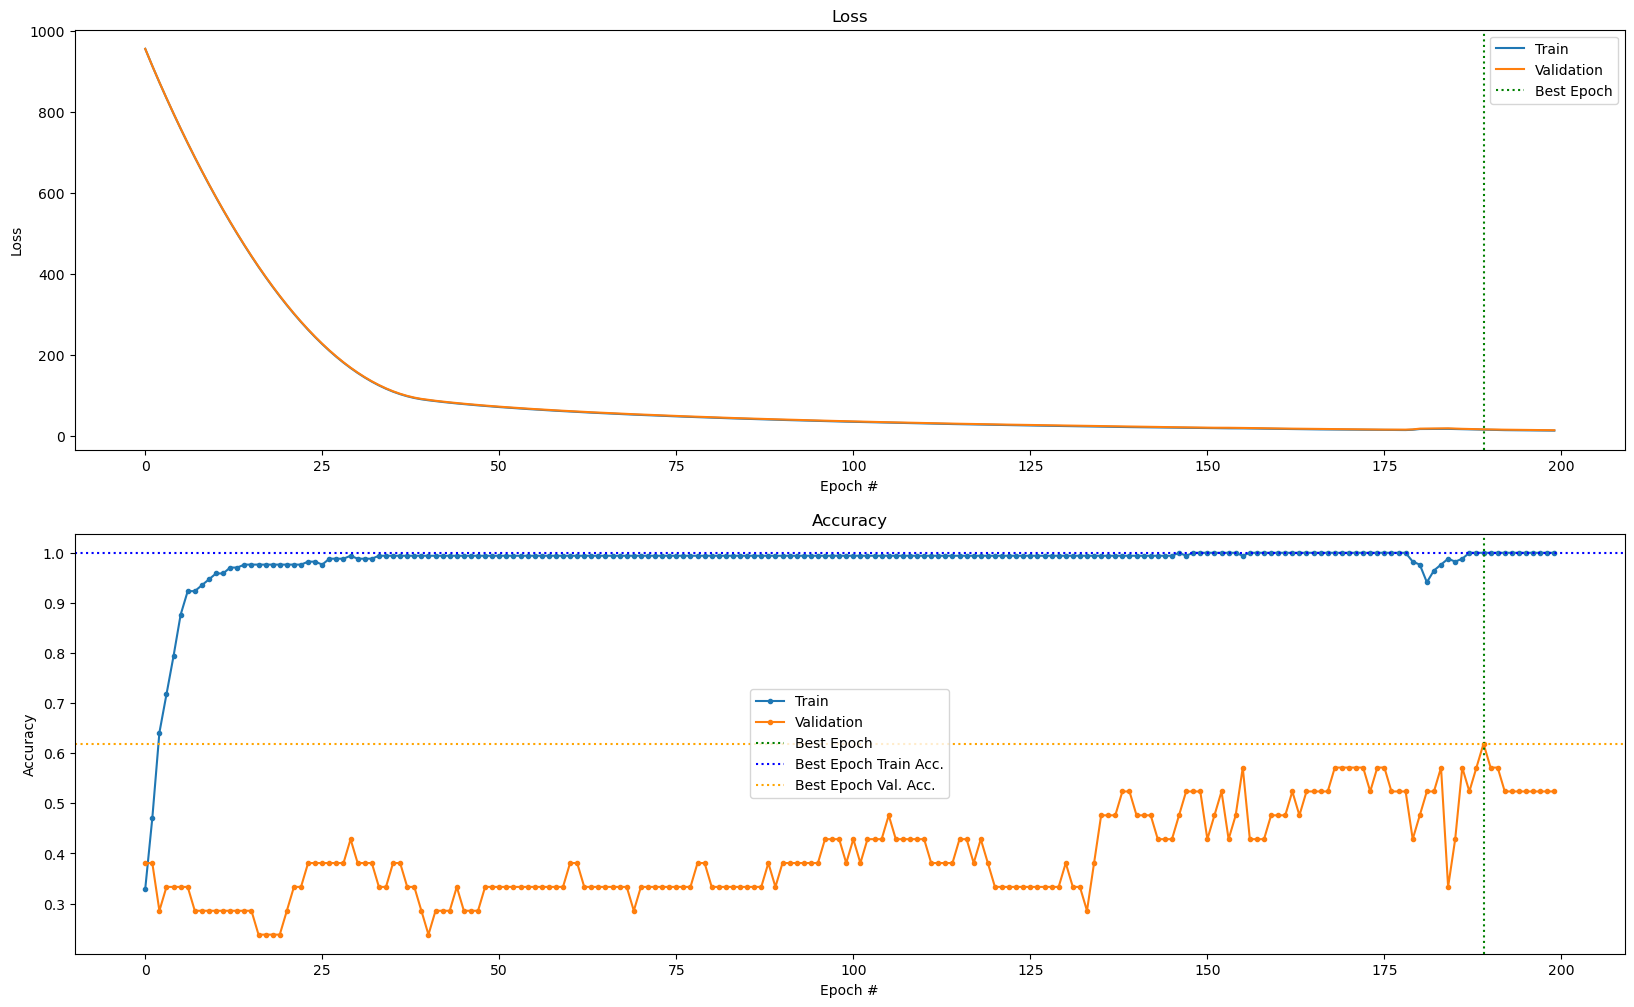

In [14]:
model9 = LSTMClassifier(
    feature='spectrograms',
    input_size=2049,
    hidden_size=128,
    out_features=4,
    num_layers=1,
    bidirectional=True
).to(device)

print(model9(train_dset.features).shape)

trainer = MultiClassTrainer(
    num_classes=4,
    device=device
)

bs = 8
epochs = 200
lam = 0.1
l1_ratio = 0.1
lr = 0.0001

trainer.train(model9, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=True)

print(trainer.evaluate_performance(model9, test_dset))

torch.Size([170, 4])
Training start
Epoch 0    Train Loss=28.2342    Train Acc=0.2882    Val Loss=28.2637    Val Acc=0.3333
Epoch 1    Train Loss=27.8698    Train Acc=0.3118    Val Loss=27.9018    Val Acc=0.3333
Epoch 2    Train Loss=27.5105    Train Acc=0.3471    Val Loss=27.5443    Val Acc=0.3333
Epoch 3    Train Loss=27.1558    Train Acc=0.3824    Val Loss=27.1894    Val Acc=0.3333
Epoch 4    Train Loss=26.8111    Train Acc=0.4059    Val Loss=26.8492    Val Acc=0.3333
Epoch 5    Train Loss=26.4704    Train Acc=0.4000    Val Loss=26.5160    Val Acc=0.2857
Epoch 6    Train Loss=26.1310    Train Acc=0.4059    Val Loss=26.1778    Val Acc=0.3810
Epoch 7    Train Loss=25.7982    Train Acc=0.4235    Val Loss=25.8450    Val Acc=0.3810
Epoch 8    Train Loss=25.4709    Train Acc=0.4176    Val Loss=25.5175    Val Acc=0.3810
Epoch 9    Train Loss=25.1437    Train Acc=0.4118    Val Loss=25.1930    Val Acc=0.3810
Epoch 10    Train Loss=24.8214    Train Acc=0.4235    Val Loss=24.8754    Val Acc=0.

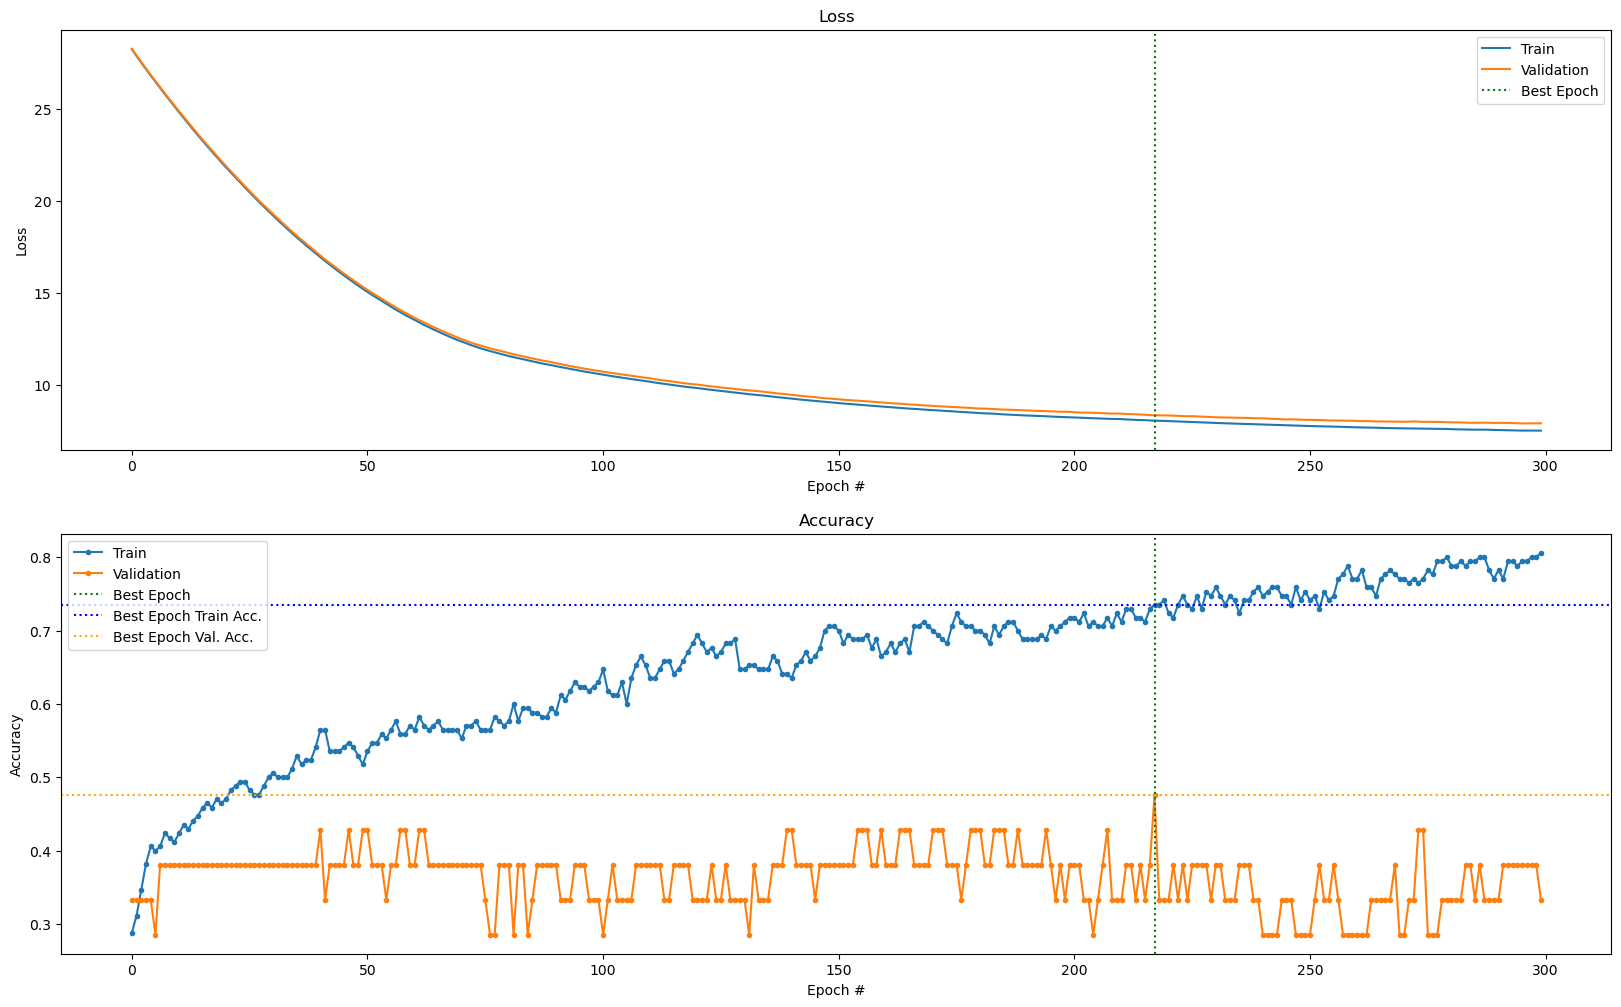

In [15]:
model10 = GRUClassifier(
    feature='mfcc',
    input_size=20,
    hidden_size=8,
    out_features=4,
    num_layers=1,
    bidirectional=True
).to(device)

print(model10(train_dset.features).shape)

trainer = MultiClassTrainer(
    num_classes=4,
    device=device
)

bs = 8
epochs = 300
lam = 0.3
l1_ratio = 0.2
lr = 0.0002

trainer.train(model10, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=True)

print(trainer.evaluate_performance(model10, test_dset))

torch.Size([170, 4])
Training start
Epoch 0    Train Loss=52.5984    Train Acc=0.3059    Val Loss=52.5943    Val Acc=0.2857
Epoch 1    Train Loss=51.0945    Train Acc=0.3824    Val Loss=51.1021    Val Acc=0.3333
Epoch 2    Train Loss=49.6396    Train Acc=0.3059    Val Loss=49.6620    Val Acc=0.2857
Epoch 3    Train Loss=48.2150    Train Acc=0.3706    Val Loss=48.2521    Val Acc=0.1905
Epoch 4    Train Loss=46.8231    Train Acc=0.2765    Val Loss=46.8562    Val Acc=0.1905
Epoch 5    Train Loss=45.4583    Train Acc=0.2941    Val Loss=45.4964    Val Acc=0.1905
Epoch 6    Train Loss=44.1191    Train Acc=0.4118    Val Loss=44.1514    Val Acc=0.2381
Epoch 7    Train Loss=42.8085    Train Acc=0.4471    Val Loss=42.8501    Val Acc=0.2381
Epoch 8    Train Loss=41.5268    Train Acc=0.4000    Val Loss=41.5664    Val Acc=0.2857
Epoch 9    Train Loss=40.2662    Train Acc=0.4176    Val Loss=40.3132    Val Acc=0.2381
Epoch 10    Train Loss=39.0373    Train Acc=0.5118    Val Loss=39.0825    Val Acc=0.

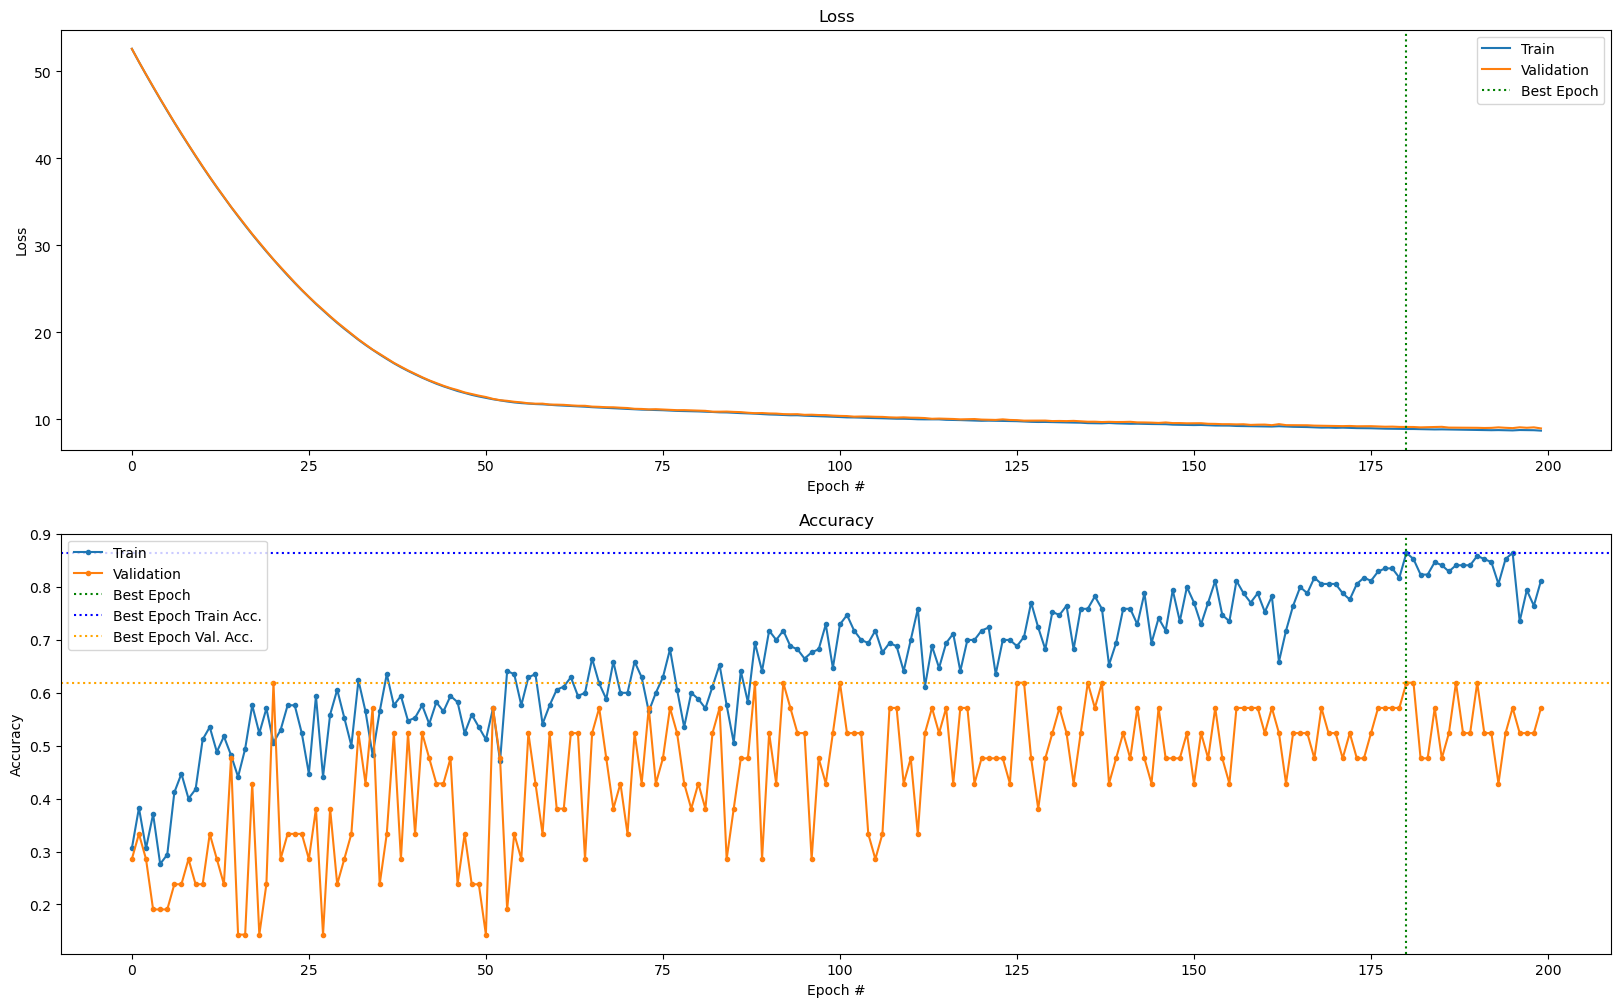

In [16]:
model11 = GRUClassifier(
    feature='melspecs',
    input_size=128,
    hidden_size=64,
    out_features=4,
    num_layers=1,
    bidirectional=True
).to(device)

print(model11(train_dset.features).shape)

trainer = MultiClassTrainer(
    num_classes=4,
    device=device
)

bs = 8
epochs = 200
lam = 0.1
l1_ratio = 0.1
lr = 0.0001

trainer.train(model11, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=True)

print(trainer.evaluate_performance(model11, test_dset))

torch.Size([170, 4])
Training start
Epoch 0    Train Loss=10651.1396    Train Acc=0.3588    Val Loss=10651.1416    Val Acc=0.4286
Epoch 1    Train Loss=10123.0420    Train Acc=0.4235    Val Loss=10123.0781    Val Acc=0.4286
Epoch 2    Train Loss=9609.3975    Train Acc=0.4824    Val Loss=9609.4629    Val Acc=0.4286
Epoch 3    Train Loss=9109.5537    Train Acc=0.5647    Val Loss=9109.6455    Val Acc=0.4286
Epoch 4    Train Loss=8623.9004    Train Acc=0.6294    Val Loss=8624.0088    Val Acc=0.3810
Epoch 5    Train Loss=8152.1963    Train Acc=0.6706    Val Loss=8152.3223    Val Acc=0.3810
Epoch 6    Train Loss=7694.5439    Train Acc=0.6941    Val Loss=7694.6870    Val Acc=0.3810
Epoch 7    Train Loss=7250.9126    Train Acc=0.7471    Val Loss=7251.0684    Val Acc=0.4286
Epoch 8    Train Loss=6821.0732    Train Acc=0.7647    Val Loss=6821.2407    Val Acc=0.4286
Epoch 9    Train Loss=6404.9082    Train Acc=0.8000    Val Loss=6405.0933    Val Acc=0.3810
Epoch 10    Train Loss=6002.2964    Trai

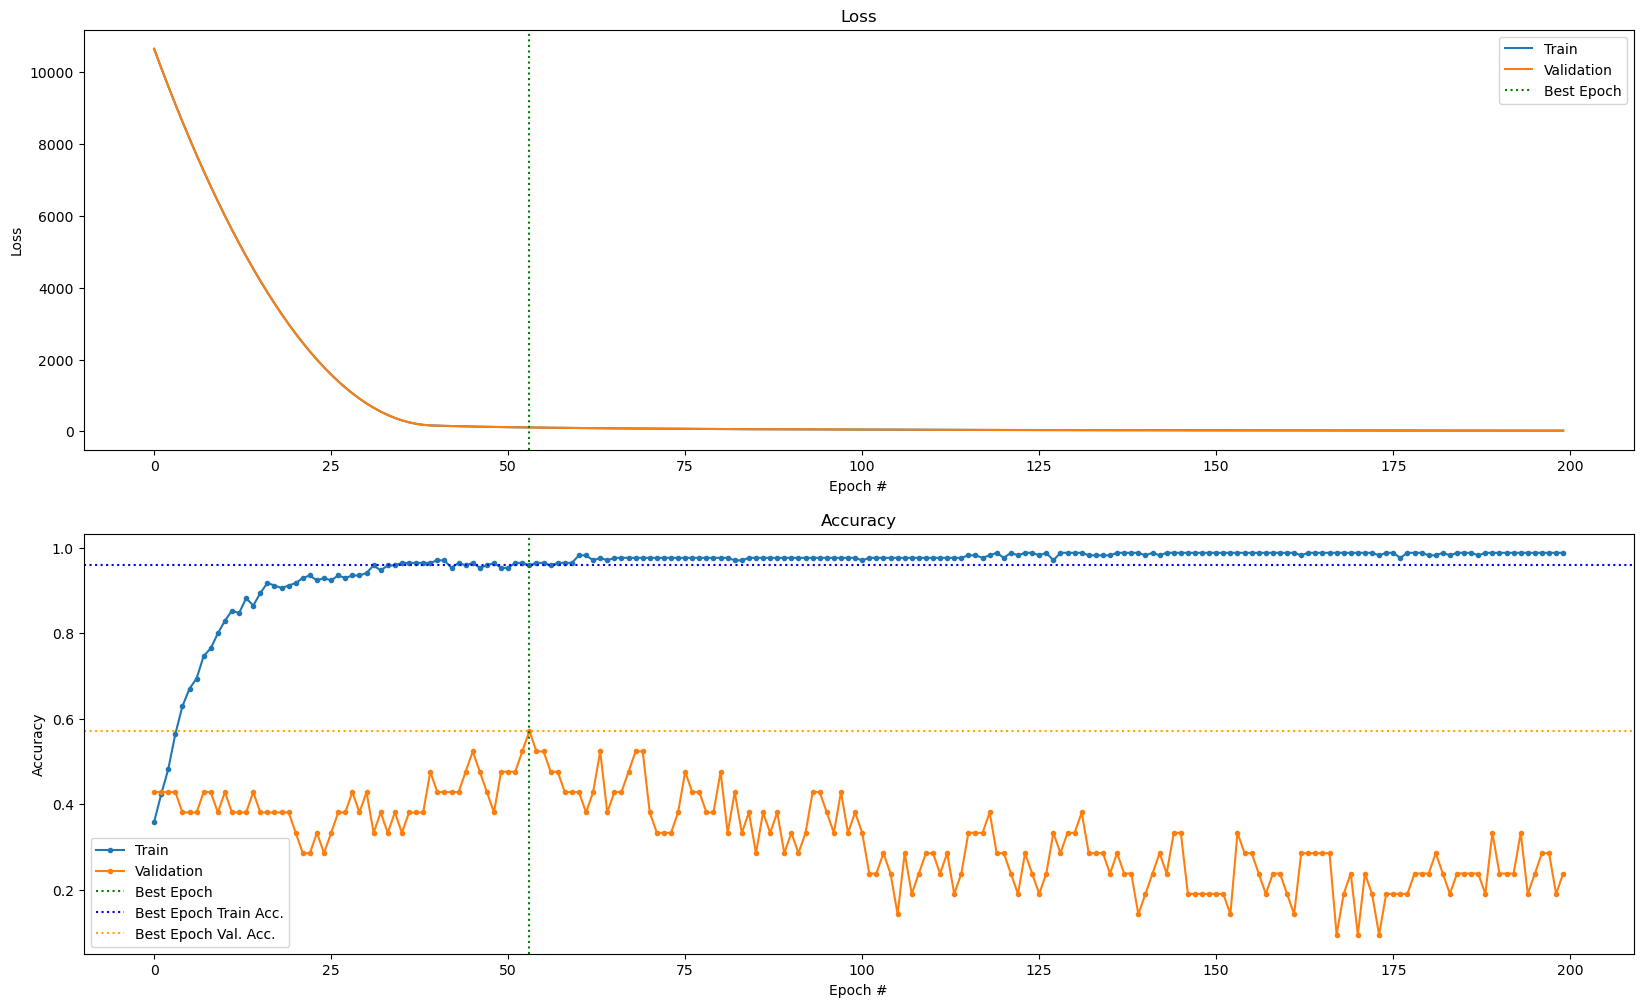

In [17]:
model12 = GRUClassifier(
    feature='spectrograms',
    input_size=2049,
    hidden_size=128,
    out_features=4,
    num_layers=1,
    bidirectional=True
).to(device)

print(model12(train_dset.features).shape)

trainer = MultiClassTrainer(
    num_classes=4,
    device=device
)

bs = 8
epochs = 200
lam = 0.5
l1_ratio = 0.3
lr = 0.0001

trainer.train(model12, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=True)

print(trainer.evaluate_performance(model12, test_dset))

In [18]:
# Collate Function
def collate_fn(batch):
    waveforms, labels = zip(*batch)
    waveforms = torch.nn.utils.rnn.pad_sequence(waveforms, batch_first=True)
    labels = torch.tensor(labels)
    return waveforms, labels

# # Audio preprocessing
# class Stereo2Mono(torch.nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.weights = torch.tensor([0.5, 0.5], requires_grad=False).view(2, 1)

#     def forward(self, waveform: torch.Tensor) -> torch.Tensor:
#         if waveform.shape[0] == 2:
#             return torch.sum(waveform * self.weights, dim=0) * np.sqrt(2)
#         return waveform

# def path_to_waveform_tensor(path: str, sample_rate=44100):
#     waveform, sr = torchaudio.load(path)
#     if sr != sample_rate:
#         waveform = torchaudio.transforms.Resample(sr, sample_rate)(waveform)
#     mono_wf = Stereo2Mono()(waveform)
#     return mono_wf.squeeze(0).cpu()

# def split_waveform_segments(wf: torch.Tensor, target_len=TARGET_AUDIO_LENGTH, min_length: int=TARGET_SAMPLE_RATE * 10, train: bool=False):
#     wf_len = wf.shape[0]
#     if wf_len < target_len:
#         return [wf.detach().clone()] if wf_len >= min_length else []
#     else:
#         hop_length = target_len // 2 if train else target_len
#         segments = []
#         for i in range(0, wf_len, hop_length):
#             if wf_len - i > target_len:
#                 segments.append(wf[i:i+target_len])
#             elif wf_len - i >= min_length:
#                 segments.append(wf[-target_len if train else i:])
#         return segments

# Dataset
class AudioEmotionDataset(Dataset):
    def __init__(self, dataframe, data_dir, train=True):
        self.dataframe = dataframe
        self.data_dir = data_dir
        self.train = train
        self.data = []
        self.labels = []
        self.prepare_dataset()

    def prepare_dataset(self):
        for _, row in tqdm(self.dataframe.iterrows(), total=len(self.dataframe)):
            audio_path = os.path.join(self.data_dir, row["File"])
            label = LABEL_TO_INT[row["Emotion"]]
            try:
                wf = path_to_waveform_tensor(audio_path)
                segments = split_waveform_segments(wf, train=self.train)
                self.data.extend(segments)
                self.labels.extend([label] * len(segments))
            except Exception as e:
                print(f"Error loading {audio_path}: {e}")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.labels[idx]
        return x, y


class FeatureExtractor(nn.Module):
    def __init__(self):
        super().__init__()
        self.melspec = torchaudio.transforms.MelSpectrogram(
            sample_rate=TARGET_SAMPLE_RATE, n_mels=128, n_fft=4096, center=True
        )
        # Ensure that the tensor is moved to CPU before applying librosa function
        self.norm = lambda x: torch.from_numpy(librosa.power_to_db(x.cpu().numpy(), ref=np.max))

    def forward(self, x):
        x = self.melspec(x)
        x = self.norm(x)
        return x

# Positional encoding
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=2000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

# Improved Transformer
class ImprovedEmotionTransformer(nn.Module):
    def __init__(self, input_dim=128, num_classes=4, d_model=128, nhead=8, num_layers=4, dropout=0.7):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model)

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=512, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.dropout = nn.Dropout(dropout)
        self.fc_out = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1)               # (B, T, F)
        x = self.input_proj(x)               # (B, T, D)
        x = self.pos_encoder(x)
        x = x.permute(1, 0, 2)               # (T, B, D)
        x = self.transformer_encoder(x)
        x = x.mean(dim=0)                    # (B, D)
        x = self.dropout(x)
        return self.fc_out(x)


NameError: name 'Dataset' is not defined

In [ ]:
# class ImprovedEmotionTransformer(torch.nn.Module):
#     def __init__(self, input_dim=128, num_classes=4, d_model=128, nhead=8, num_layers=4, dropout=0.7):
#         super().__init__()
#         self.input_proj = torch.nn.Linear(input_dim, d_model)
#         self.pos_encoder = PositionalEncoding(d_model)

#         encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=512, dropout=dropout)
#         self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

#         self.dropout = nn.Dropout(dropout)
#         self.fc_out = nn.Linear(d_model, num_classes)

#     def forward(self, x):
#         x = x.permute(0, 2, 1)               # (B, T, F)
#         x = self.input_proj(x)               # (B, T, D)
#         x = self.pos_encoder(x)
#         x = x.permute(1, 0, 2)               # (T, B, D)
#         x = self.transformer_encoder(x)
#         x = x.mean(dim=0)                    # (B, D)
#         x = self.dropout(x)
#         return self.fc_out(x)